In [1]:
!pip install kaggle

In [2]:
import os
from google.colab import userdata
#Collab secrets
try:
    os.environ["KAGGLE_API_TOKEN"] = userdata.get('KAGGLE_API_TOKEN')
    print("Token loaded successfully.")
except Exception as e:
    print("Could not load token")

!kaggle competitions list | head -n 5

Token loaded successfully.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
!pip uninstall -y kaggle
!pip install -q kaggle

Found existing installation: kaggle 1.7.4.5
Uninstalling kaggle-1.7.4.5:
  Successfully uninstalled kaggle-1.7.4.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 kB 5.6 MB/s eta 0:00:00


In [4]:
!pip install -q kaggle

In [5]:
!kaggle datasets list | head -n 5

ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        296                1  
serkantysz/550k-spotify-songs-audio-lyrics-and-genres             550K Spotify Songs: Audio, Lyrics & Genres           246075351  2026-01-02 20:43:03.863000              0         36                1  
rockyt07/social-media-user-analysis                               Social Media User Analysis                           247842357  2026-01-14 02:28:41.970000              0         67          

In [6]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 98% 647M/658M [00:05<00:00, 117MB/s]
100% 658M/658M [00:05<00:00, 124MB/s]


In [7]:
!ls

plantdisease.zip  sample_data


In [8]:
!unzip -q plantdisease.zip
!ls

plantdisease.zip  plantvillage	PlantVillage  sample_data


In [9]:
!ls PlantVillage | head

Pepper__bell___Bacterial_spot
Pepper__bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Late_blight
Tomato_Leaf_Mold


In [10]:
!ls PlantVillage/Tomato_healthy | head


000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG
0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG
003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG
00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG
014b5e19-7917-4d76-b632-b5dd31d999ec___RS_HL 9640.JPG
01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG
0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580.JPG
017a4026-813a-4983-887a-4052bb78c397___RS_HL 0218.JPG
0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH_HL Leaf 422.1.JPG


#Imports & Data Preparation

In [11]:
import os
import shutil

BASE_DIR = "PlantVillage"
WORK_DIR = "plant_data"

TRAIN_DIR = os.path.join(WORK_DIR, "train")
VAL_DIR = os.path.join(WORK_DIR, "val")

classes = {
    "Tomato_healthy": "Tomato_Healthy",
    "Tomato_Late_blight": "Tomato_Late_Blight",
    "Potato___Early_blight": "Potato_Early_Blight",
    "Pepper__bell___Bacterial_spot": "Pepper_Bacterial_Spot"
}

for split in [TRAIN_DIR, VAL_DIR]:
    for cls in classes.values():
        os.makedirs(os.path.join(split, cls), exist_ok=True)

#Split the Dataset

In [12]:
import random

def split_and_copy(src_folder, dst_train, dst_val, split_ratio=0.8):
    images = os.listdir(src_folder)
    random.shuffle(images)

    split_idx = int(len(images) * split_ratio)
    train_imgs = images[:split_idx]
    val_imgs = images[split_idx:]

    for img in train_imgs:
        shutil.copy(
            os.path.join(src_folder, img),
            os.path.join(dst_train, img)
        )

    for img in val_imgs:
        shutil.copy(
            os.path.join(src_folder, img),
            os.path.join(dst_val, img)
        )

for src, dst in classes.items():
    split_and_copy(
        os.path.join(BASE_DIR, src),
        os.path.join(TRAIN_DIR, dst),
        os.path.join(VAL_DIR, dst)
    )


In [13]:
#Verify Image Counts

def count_image(path):
  for cls in sorted(os.listdir(path)):
    print(f"{cls}: {len(os.listdir(os.path.join(path, cls)))}")

print("TRAIN: ")
count_image(TRAIN_DIR)

print("\nVAL: ")
count_image(VAL_DIR)

TRAIN: 
Pepper_Bacterial_Spot: 797
Potato_Early_Blight: 800
Tomato_Healthy: 1272
Tomato_Late_Blight: 1527

VAL: 
Pepper_Bacterial_Spot: 200
Potato_Early_Blight: 200
Tomato_Healthy: 319
Tomato_Late_Blight: 382


#Load Datasets

Found 4396 files belonging to 4 classes.
Found 1101 files belonging to 4 classes.
['Pepper_Bacterial_Spot', 'Potato_Early_Blight', 'Tomato_Healthy', 'Tomato_Late_Blight']


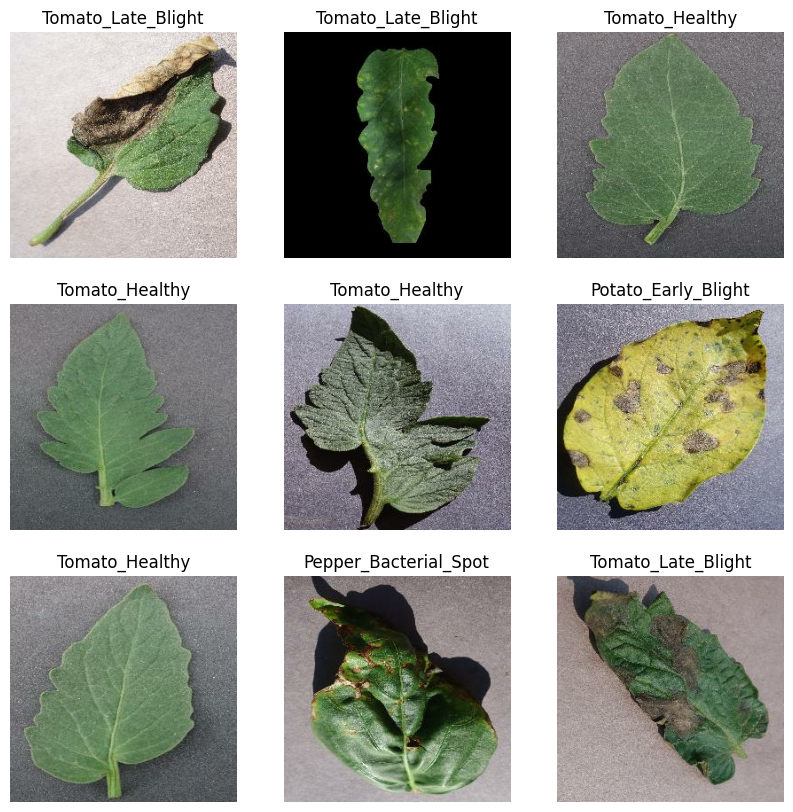

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32


train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True
)

CLASS_NAME = train_dataset.class_names
print(CLASS_NAME)

plt.figure(figsize=(10,10))

for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = tf.argmax(labels[i], axis=-1)
    plt.title(CLASS_NAME[label_index])
    plt.axis("off")

plt.show()

#Build CNN

In [62]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Define the Augmentation Block
# This tells the model: "For every epoch, randomly flip, rotate, and zoom the images"
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2), # Rotates up to 20%
  layers.RandomZoom(0.2),     # Zooms in/out up to 20%
])

# 2. Build Your Model (With Augmentation added first)
model = models.Sequential([

    # --- STEP 1: Augmentation (First Layer) ---
    data_augmentation,

    # --- STEP 2: Rescaling (0-255 -> 0-1) ---

    layers.Rescaling(1./255, input_shape=(256, 256, 3)),

    # --- STEP 3: Your Convolutional Layers (The CNN) ---
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # --- STEP 4: Classifier ---
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # Drops 50% of neurons randomly to prevent overfitting
    layers.Dense(4, activation='softmax') # 4 classes
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train
#With augmentation, you often need MORE epochs to reach high accuracy

In [63]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    "plant_disease_detection.keras",
    monitor="val_accuracy",
    save_best_only=True
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.3540 - loss: 1.3146 - val_accuracy: 0.6694 - val_loss: 0.8307
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.6288 - loss: 0.8533 - val_accuracy: 0.6585 - val_loss: 0.8158
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.7707 - loss: 0.5805 - val_accuracy: 0.7738 - val_loss: 0.6880
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8481 - loss: 0.4174 - val_accuracy: 0.7393 - val_loss: 0.7551
Epoch 5/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.8924 - loss: 0.3234 - val_accuracy: 0.8683 - val_loss: 0.5185
Epoch 6/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9214 - loss: 0.2252 - val_accuracy: 0.9310 - val_loss: 0.2277
Epoch 7/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9270 - loss: 0.2179 - val_accuracy: 0.8401 - val_loss: 0.4978
Epoch 8/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9432 - loss: 0.1774 - val_acc

In [64]:
scores = model.evaluate(val_dataset)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9923 - loss: 0.0325


In [65]:
scores

[0.040984492748975754, 0.9909173250198364]

In [66]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 138}

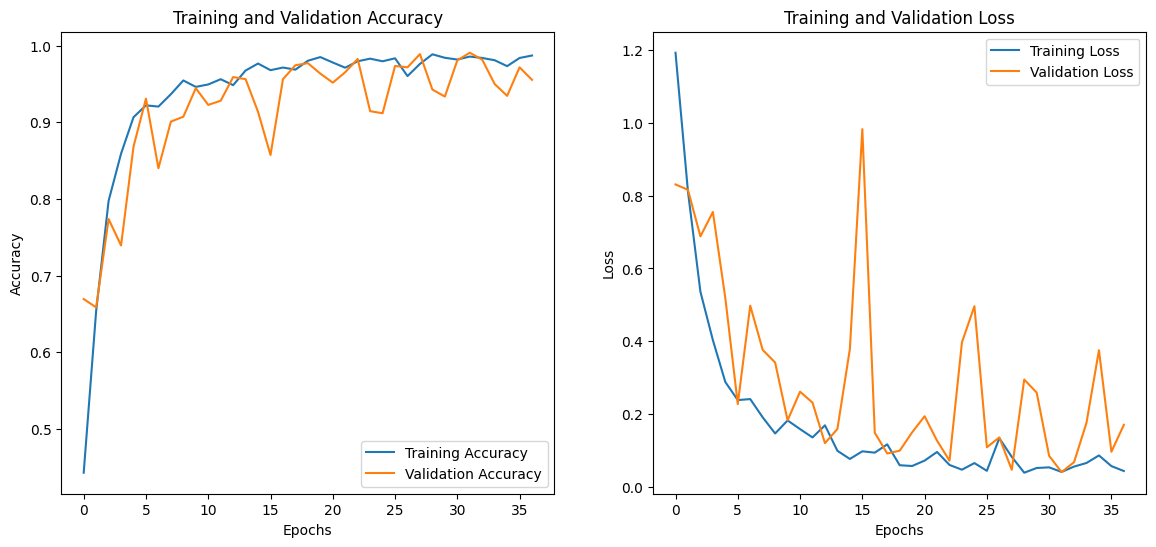

In [67]:
import matplotlib.pyplot as plt

# 1. Extract the metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# 2. Define the range of epochs (ensures x-axis matches actual epochs run)
epochs_range = range(len(acc))

# 3. Setup the plot area
plt.figure(figsize=(14, 6))

# --- Plot Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# --- Plot Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [68]:
# Save the model to a single file
model.save('plant_disease_detection.keras')

print("Model saved successfully!")

Model saved successfully!


#Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


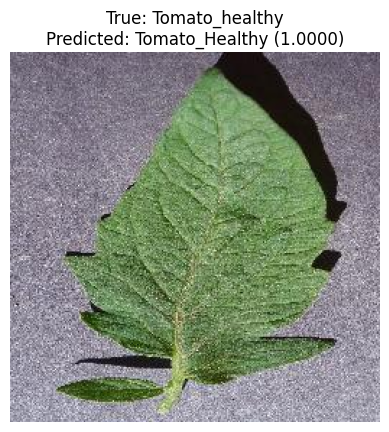

In [69]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(IMAGE_SIZE[0], IMAGE_SIZE[1]))

    # Convert to array (Values are 0-255)
    # DO NOT divide by 255 here, because your model has layers.Rescaling(1./255)
    img_array = image.img_to_array(img)

    # Add batch dimension (1, 256, 256, 3)
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_batch)
    idx = np.argmax(pred)
    confidence = pred[0][idx]

    folder_name = os.path.basename(os.path.dirname(img_path))

    # Display
    # cast to uint8 for display (expects 0-255)
    plt.imshow(img_array.astype("uint8"))
    plt.axis("off")
    # Fixed variable name from CLASS_NAMES to CLASS_NAME
    plt.title(f"True: {folder_name}\nPredicted: {CLASS_NAME[idx]} ({confidence:.4f})")
    plt.show()

# Test with an image
test_image_path = "PlantVillage/Tomato_healthy/003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG"
if os.path.exists(test_image_path):
    predict_image(test_image_path)
else:
    print("Image not found, check path.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


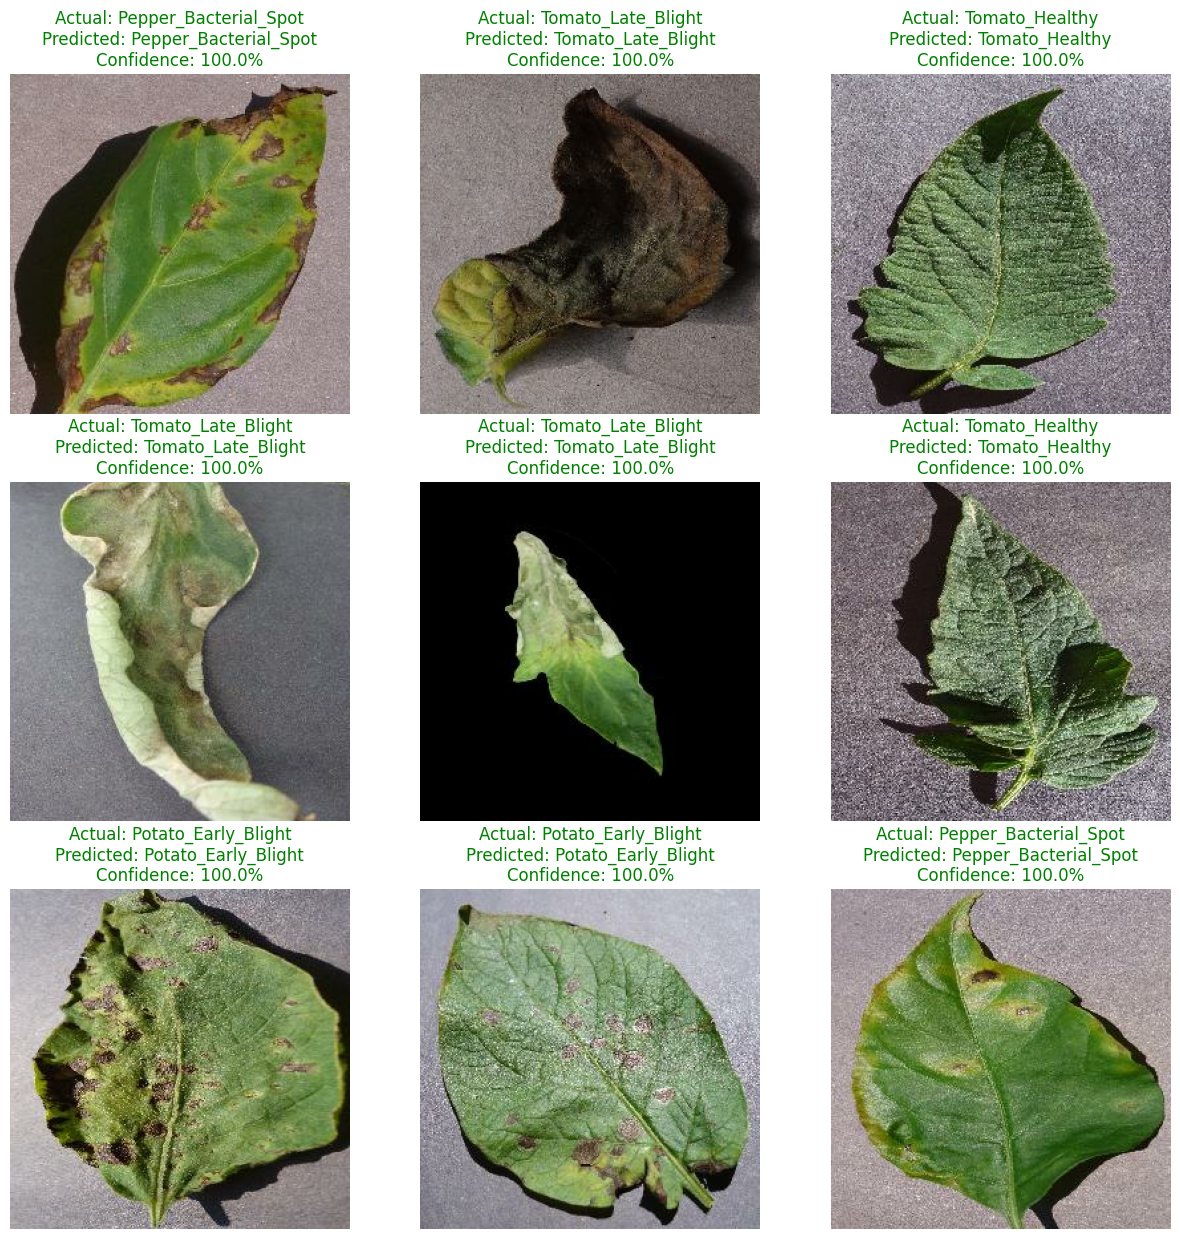

In [70]:
# 1. Define the Helper Function
def predict(model, img):
    # Add the batch dimension (from (256, 256, 3) -> (1, 256, 256, 3))
    img_array = tf.expand_dims(img, 0)

    # Run prediction
    predictions = model.predict(img_array)

    # Get the label and confidence
    predicted_class = CLASS_NAME[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# 2. Run the Visualization Loop
plt.figure(figsize=(15, 15))

# take(1) grabs the first batch.
# If you want it truly random every time, use test_ds.shuffle(100).take(1)
for images, labels in val_dataset.shuffle(100).take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Display image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get prediction
        # Note: images[i] is a tensor, .numpy() converts it for processing
        predicted_class, confidence = predict(model, images[i].numpy())

        # Get actual class
        # labels[i] is a one-hot vector or integer depending on your setup.
        # If your labels are one-hot encoded (e.g., [0, 0, 1, 0]), use argmax:
        if len(labels[i].shape) > 0:
             actual_class = CLASS_NAME[np.argmax(labels[i])]
        else:
             # If labels are just integers (SparseCategoricalCrossentropy)
             actual_class = CLASS_NAME[labels[i]]

        # Title with color coding (Green for correct, Red for wrong)
        is_correct = predicted_class == actual_class
        color = "green" if is_correct else "red"

        plt.title(
            f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%",
            color=color
        )

        plt.axis("off")

plt.show()

In [71]:
!ls PlantVillage/Tomato_healthy | head


000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG
000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG
0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG
003944fc-3b99-4a0f-9ed4-0e07352fd8b3___RS_HL 9844.JPG
00bce074-967b-4d50-967a-31fdaa35e688___RS_HL 0223.JPG
014b5e19-7917-4d76-b632-b5dd31d999ec___RS_HL 9640.JPG
01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG
0172e56c-8bb8-4e75-8ac7-509df81393e8___RS_HL 0580.JPG
017a4026-813a-4983-887a-4052bb78c397___RS_HL 0218.JPG
0184dc6b-bfc1-4515-ac59-bbadaf524e1a___GH_HL Leaf 422.1.JPG


In [72]:
!ls -lh plant_disease_detection.keras

-rw-r--r-- 1 root root 2.2M Jan 18 04:54 plant_disease_detection.keras


In [75]:
import tensorflow as tf

# 1. Load your existing model
model = tf.keras.models.load_model('plant_disease_detection.keras')

# 2. Convert it to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 3. Save the new file
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

print("Success! model.tflite created.")

Saved artifact at '/tmp/tmp655k88n0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_12')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139573401802256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401810704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401808976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401809936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401796880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401801872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139572867407824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139572867407440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139572867406864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139572867408784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139573401810

In [76]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>